In [2]:
# ############################################ Projeto Final (parte I) ##################################################################
# Base de dados: Fashion MNIST
#    O Fashion MNIST foi criado pela empresa de comércio eletrônico Zalando como uma alternativa ao MNIST.
#    É composto de 70.000 de imagens de vestuários em escala de cinza, cada uma associada a um rótulo de 10 classes (camisetas,
# calças, pulôveres, vestidos, casacos, sandálias, camisas, tênis, bolsas e botas). Possui 7000 imagens por categoria.
#    Também, é dividido em conjunto de treinamento com 60.000 imagens e conjunto de testes com 10.000 imagens.
# Resumo das Características:
# 60.000 imagens de treinamento
# 10.000 imagens de testes
# 10 Rótulos
# Pixel 28x28
# Cor: escala cinza
# Download disponível gratuitamente em: https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion
#
# Objetivo:
#    Verificar a classificação das imagens da base de dados Fashion MNIST pelas técnicas SVM (Support-vector machine) e 
# CNN (Convolutional Neural Networks).
#
# Estrutura do trabalho:
#    Este trabalho está dividido em dois arquivos (projeto_final_parte_1.ipynb e projeto_final_parte_2.ipynb)
#    No caderno projeto_final_parte_1.ipynb apresentaremos o trabalho e o modelo de classificação SVM
#    No caderno projeto_final_parte_2.ipynb o modelo de classificação CNN
#    
# Roteiro do trabalho:
#   1. Download da base de dados 
#   2. Visão computacional - normalização
#   3. Análise exploratória
#   4. Estratégia de separação do conjunto de testes e treinamento
#   5. Aplicar as técnicas de SVM e CNN
#   6. Apresentar as métricas: matriz de confusão, tempo de treinamento, acurácia no final do treinamento, etc..
#
# Trabalhos futuros:
#   Aplicação de outras técnicas de classificação na base de dados, bem como avaliação de outras métricas possíveis.
#   Testar outras estratégia de separação de dados
#   Utilização da base de dados para aplicação da rede GAN.
#
# Dificuldades
#   Remodelagem dos dados (reshape) para submissão ao treinamento
#   Inexperiência na linguagem phyton
#
# Referências
# https://scikit-learn.org/stable/modules/svm.html
# https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# https://towardsdatascience.com/understanding-neural-networks-from-neuron-to-rnn-cnn-and-deep-learning-cd88e90e0a90

In [54]:
# Instalando bibliotecas
import numpy as np
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import style
from time import process_time
style.use('ggplot')

In [55]:
# ---> 1. Download da base de dados 

# Carregarando o Fashion Mnist diretamente pelo TensorFlow
fashion_mnist = keras.datasets.fashion_mnist

In [56]:
# ---> 2. Visão computacional

# Quatro arrays retornados após o download:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [57]:
# Armazenaremos o nome das classes em um vetor que utilizaremos posteriormente quando plotarmos as imagens em um gráfico. 
arr = ['Top', 'Calca', 'Pulover', 'Vestido', 'Casaco', 
               'Sandalia', 'Camiseta', 'Sapatilha', 'Bolsa', 'Bota']

In [58]:
# ---> 3. Análise exploratória
# Antes do treinamento é importante observar os dados em detalhes. Para isso, utilizou-se os comandos print, shape e len

print(train_images.shape)
# (60000, 28, 28)

print(len(train_images))
# 60000

print(train_labels)
# array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

print(test_images.shape)
# (10000, 28, 28)

print(len(test_images))
# 10000

print(test_images)
# array([9, 8, 0, ..., 3, 2, 5], dtype=uint8)
   

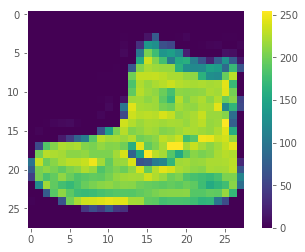

In [59]:
# Como os dados precisam ser preprocessados, isto é, preparados adequadamente antes de se treinar o modelo é importante 
# observar a primeira imagem do conjunto de treino: 
# Pixels variam de 0 a 255:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [60]:
# ---> Normalização 

#    Alterando pixel para 0 a 1

train_images = train_images / 255.0
test_images = test_images / 255.0

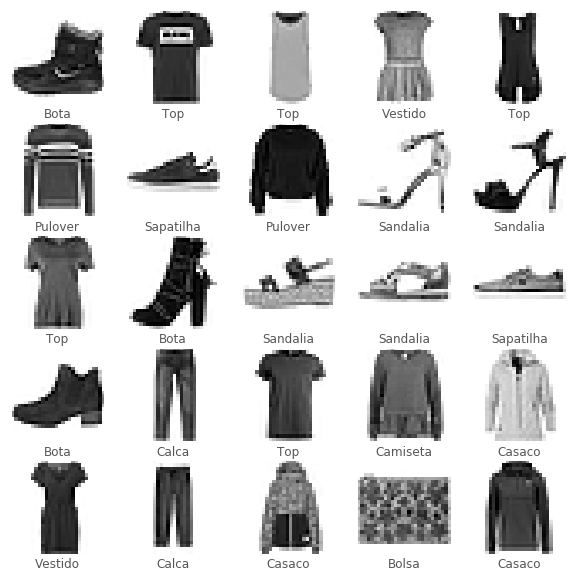

In [61]:
# imprimindo uma amostra do conjunto de dados após normalização

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(arr[train_labels[i]])

In [62]:
# 5. ----> Aplicar as técnicas: SVM

print ('\nReshape da imagem para o comando fit...')
X = train_images.shape[0]
image_train = train_images.reshape(X, -1)

In [63]:
# Preparação para treinamento da classificação e Teste dos dados
print('\nPreparação para treinamento da classificação e Teste dos dados...')
image_train, test_images, train_labels, test_labels = model_selection.train_test_split(image_train,train_labels,test_size=0.1)

In [64]:
print('\nClassificador SVM com gamma = 0.1; Kernel = polynomial')
clf = svm.SVC(gamma=0.1, kernel='poly')

print('\nIniciando treinamento...')
start = process_time()
clf.fit(image_train,train_labels)
end = process_time()
time_svm = end - start
print('Tempo de treinamento_svm: ' + str(time_svm))

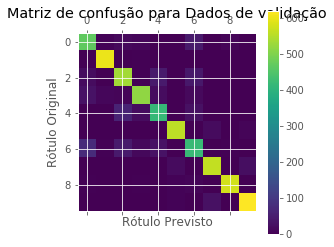

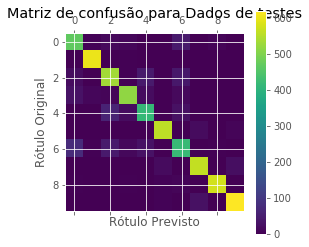

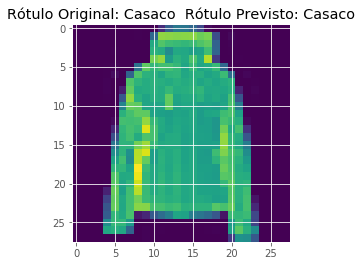

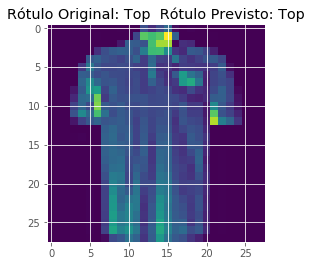

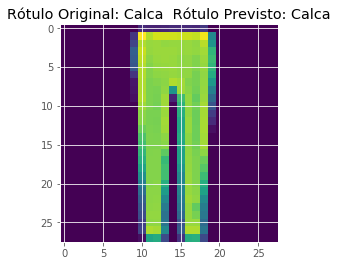

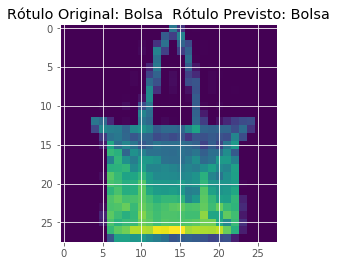

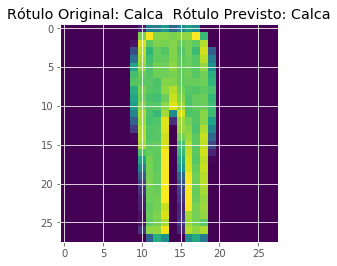

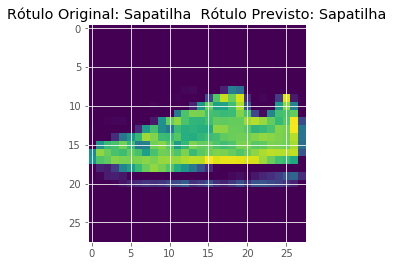

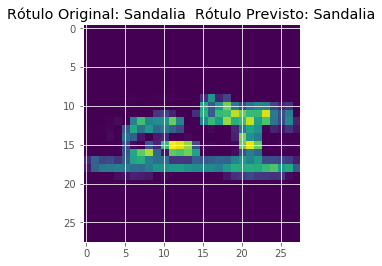

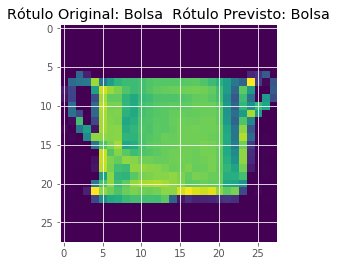

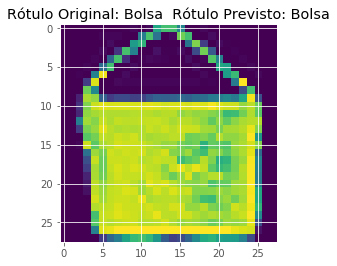

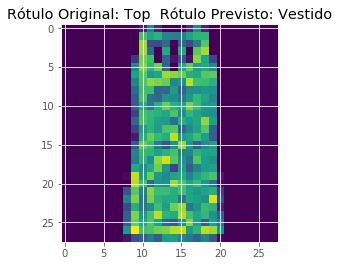

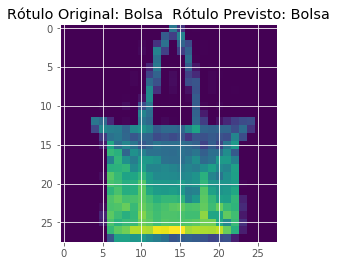

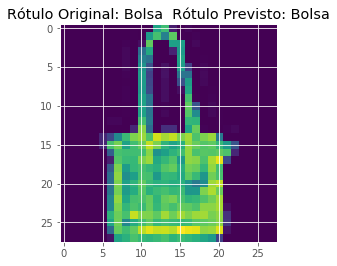

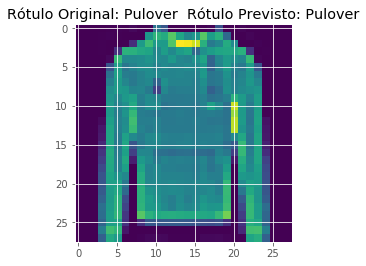

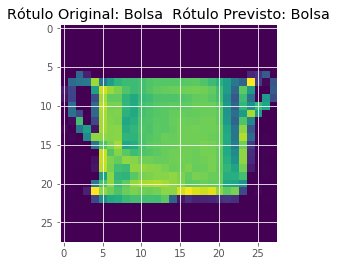

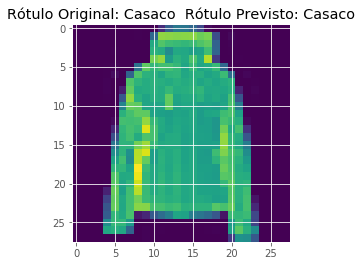

In [65]:
# ---> Apresentação de métricas: SVM

print('\nCalcular acurácia do classificador treinado...')
acc = clf.score(test_images,test_labels)

print('\nFazendo previsões sobre dados de validação...')
y_pred = clf.predict(test_images)

print('\nCalculando acurácia das previsões...')
accuracy = accuracy_score(test_labels, y_pred)

print('\nCriando Matriz de Confusão...')
conf_mat = confusion_matrix(test_labels, y_pred)

print('\nAcurácia do classificador treinado em SVM: ',acc)
print('\nValores da Previsão: ',y_pred)
print('\nAcurácia do Classificador nas Imagens de Validação: ',accuracy)
print('\nMatriz de confusão: \ n',conf_mat)

# Plotar dados da matriz de confusão como uma matriz
plt.matshow(conf_mat)
plt.title('Matriz de confusão para Dados de validação')
plt.colorbar()
plt.ylabel('Rótulo Original')
plt.xlabel('Rótulo Previsto')
plt.show()

print('\nFazendo previsões sobre imagens de entrada de teste...')
test_labels_pred = clf.predict(test_images)

print('\nCalculando acurácia do classificador treinado nos dados de teste... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Criando Matriz de Confusão para Dados de Teste...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nRótulos Previstos para Imagens de Teste: ',test_labels_pred)
print('\nAcurácia do classificador nas imagens de teste: ',acc)
print('\nMatriz de confusão para dados de teste: \ n' ,conf_mat_test)


# Plotar dados da matriz de confusão para dados de testes
plt.matshow(conf_mat_test)
plt.title('Matriz de confusão para Dados de testes')
plt.colorbar()
plt.ylabel('Rótulo Original')
plt.xlabel('Rótulo Previsto')
plt.show()

a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_images[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Rótulo Original: {0}  Rótulo Previsto: {1}'.format(arr[test_labels[i]],arr[test_labels_pred[i]]))
	plt.imshow(two_d, interpolation='nearest')
	plt.show()